
# Logistic Regression with Python

For this lecture we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in machine learning! 

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

# Exploratory Data Analysis

1. Exploring the dataset
2. Checking for imbalanced data (in Classification)
3. Missing Values
4. Numerical Discrete Features
5. Numerical Continuous Features
6. Categorical Features and cardinality
7. Correlation Plot/Matrix
8. Feature Importance (Check for unnecessaary features like id features)
7. Outliers
8. Statistical Test to check for relationships amoung features
8. Other Plots

### Import Libraries
Let's import some libraries to get started!

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Step 1 : Explore the data

Let's start by reading in the titanic_train.csv file into a pandas dataframe and explore some basic information about the data.

In [27]:
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
# show nr of rows and columns
df.shape

(891, 12)

In [29]:
# show the columns, its datatype and the number of non Nan values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200




## Step 2: Check for imbalanced data


<AxesSubplot:xlabel='Survived', ylabel='count'>

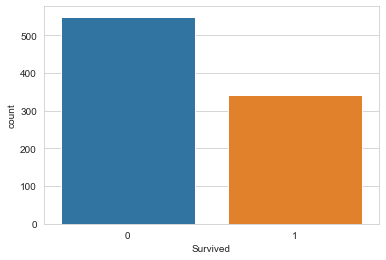

In [31]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

* We can see that the dataset is imbalanced.

In [32]:
# show the amount of records in minority and majority class
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [33]:
# show the percentage of records of minority and majority class
df['Survived'].value_counts() / len(df) * 100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

### Step 3 : Check the datatype of features
Before finding out the continuous features, discrete and categorical features we should check whether the datatype of the features is correct. For example there may be a feature with object datatype but in fact represents a numerical feature. It may have such values : 1, 5, 10, '2', '3', '4' etc. In this case we must convert the datatype from object into integer.

Lets have a look what kind of values each feature can have using unique function.

In [34]:
for col in df.columns:
    print(f'{col} -- {df[col].dtypes} -- {df[col].unique()}')
    print()

PassengerId -- int64 -- [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 24

### Step 4 : Missing Values

This function return True if there is any missing values in data, otherwise returns False. It also creates a csv file with the amount and percentage of missing values for each feature

In [35]:
def check_for_missing_values(dataset):
    
    if dataset.isna().sum().any():

        df_nan_values = pd.DataFrame()

        for col in dataset.columns:
            nr_nan_values_percentage = dataset[col].isna().mean()
            nr_nan_values = dataset[col].isna().sum()

            if nr_nan_values > 0:
                row = {'Feature' : col, 
                       'Percentage Nan Values' : nr_nan_values_percentage, 
                       'Amount Nan Values' : nr_nan_values}
                df_nan_values = df_nan_values.append(row, ignore_index=True)


        df_nan_values.to_csv('missing_values_info.csv', index=False)
        
        return True
    
    else:
        return False

In [36]:
if check_for_missing_values(df):
    print('There are missing values')
else:
    print('There are no missing values')

There are missing values


In [37]:
# show information about missing values in each column
pd.read_csv('missing_values_info.csv')

,Feature,Percentage Nan Values,Amount Nan Values
0,Age,0.198653,177.0
1,Cabin,0.771044,687.0
2,Embarked,0.002245,2.0


We can use seaborn to create a simple heatmap to see where we are missing data!

<AxesSubplot:>

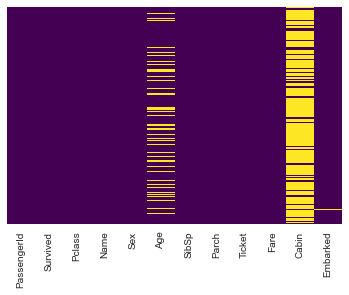

In [38]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

* Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

In [39]:
# features_with_na=[features for features in df.columns if df[features].isnull().sum()>0]

# for feature in features_with_na:
#     data = df.copy()
    
#     # let's make a variable that indicates 1 if the observation was missing or zero otherwise
#     data[feature] = np.where(data[feature].isnull(), 1, 0)
    
#     # let's calculate the mean SalePrice where the information is missing or present
#     data.groupby(feature)['Survived'].median().plot.bar()
#     plt.title(feature)
#     plt.show()

### Step 5 : Numerical Discrete Features

In [40]:
# Numerical Features
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O'] # != dtype != 'B' for bool datatype

print('Number of numerical variables: ', len(numerical_features))
print(numerical_features)

Number of numerical variables:  7
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [41]:
# Numerical Discrete Features
# I will denote a dicrete feature if it has less than 25 different numerical values

discrete_features=[feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in ['Survived',
                                                                                                                 'PassengerId']]
print("Discrete Variables Count: {}".format(len(discrete_features)))
print(discrete_features)

Discrete Variables Count: 3
['Pclass', 'SibSp', 'Parch']


Show the distribution of discrete features using Count Plot


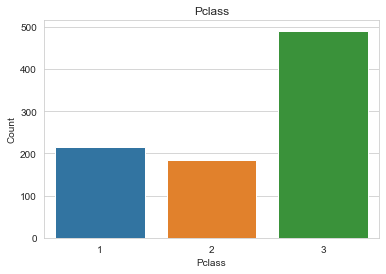

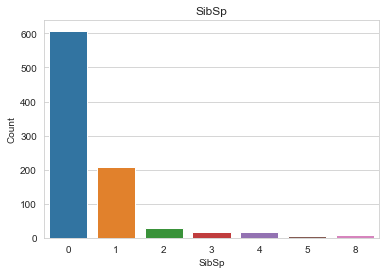

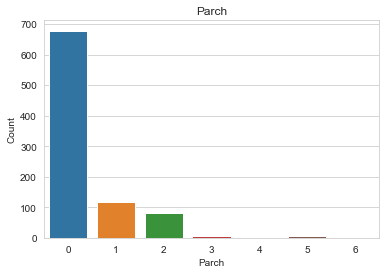

In [42]:
sns.set_style('whitegrid')

for feature in discrete_features:
    data=df.copy()
    
    sns.countplot(x=feature, data=data)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

Show relationship between dicrete feature and target feature.

For each category of discrete feature show the mean of Survived. Higher the mean, higher the chance that if a passenger belongs to this category, has survived

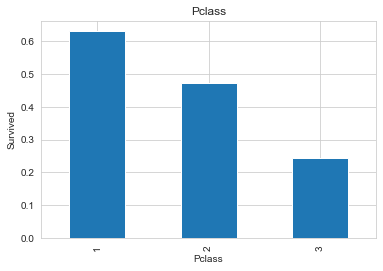

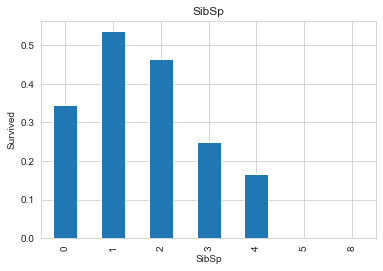

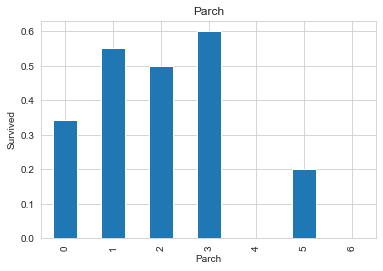

In [43]:
for feature in discrete_features:
    data=df.copy()
    data.groupby(feature)['Survived'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Survived')
    plt.title(feature)
    plt.show()

For each category of a discrete features show the count of 0s and 1s (count of passengers who survived and didnt survive). For a particular category, if the count of 1s (passengers who survived) is higher than the count of 0s (passenger who didnt survive), there is more likely that the passenger will survive if he belongs to this category.

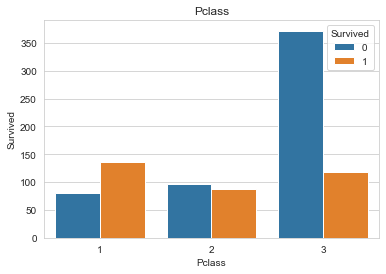

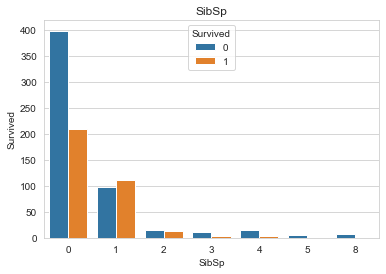

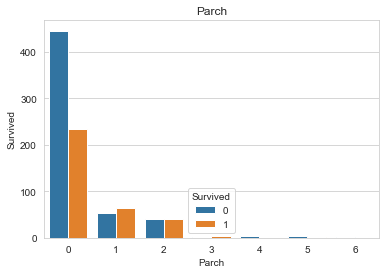

In [44]:
sns.set_style('whitegrid')

for feature in discrete_features:
    data=df.copy()
    
    sns.countplot(x=feature,hue='Survived' ,data=data)
    plt.xlabel(feature)
    plt.ylabel('Survived')
    plt.title(feature)
    plt.show()

### Step 6 : Numerical Continuous Features

In [45]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_features+['PassengerId']]
print("Continuous feature Count {}".format(len(continuous_feature)))
print(continuous_feature)

Continuous feature Count 3
['Survived', 'Age', 'Fare']


Show the distribution of continous features using Histogram/DistPlot and Boxplots.

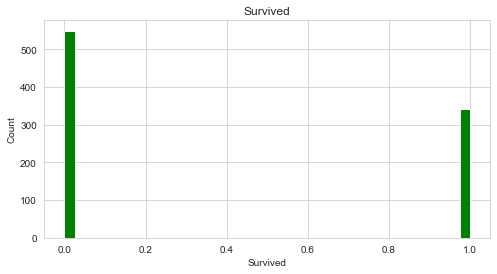

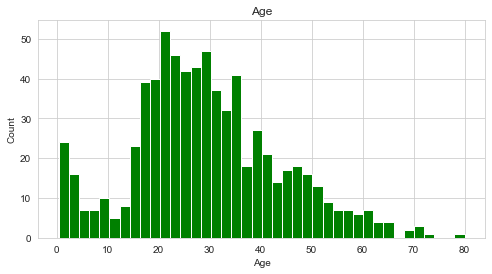

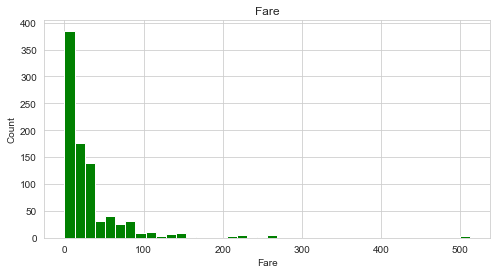

In [46]:
fig,ax = plt.subplots(5, 3,figsize = (30,15))

w = 0
for i in range(5):
    for j in range(3):
        if w == len(continuous_feature):
            break
        ax[i, j].hist(df[continuous_feature[w]], color = 'green', edgecolor = 'black')
        ax[i, j].set_title(f'Distribution of {continuous_feature[w]} ')
        w += 1
        
plt.show()

# for feature in continuous_feature:
#     data=df.copy()
#     data[feature].hist(color='green',bins=40,figsize=(8,4)) 
#     #sns.distplot(df[feature], kde=True,color='darkred',bins=40) # df[feature].dropna() to drop nan values
#     plt.xlabel(feature)
#     plt.ylabel("Count")
#     plt.title(feature)
#     plt.show()

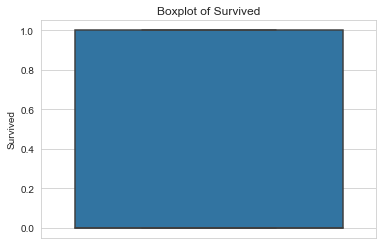

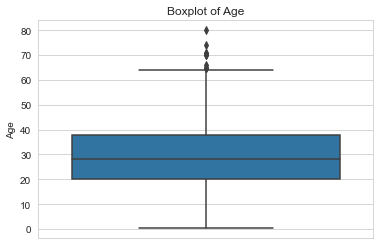

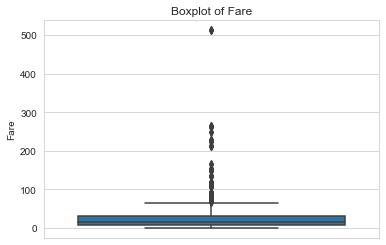

In [47]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(y=feature, data=data)
    plt.ylabel(feature)
    plt.title(f'Boxplot of {feature}')
    plt.show()

 Show relationship between continous feature and target feature.

Group by Target (Survived) and show the Boxplot or Histogram or Mean/Median of the continous feature.

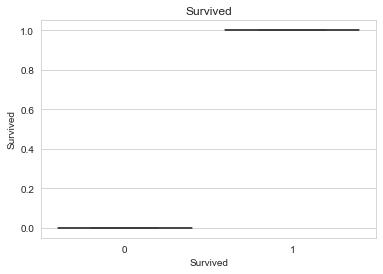

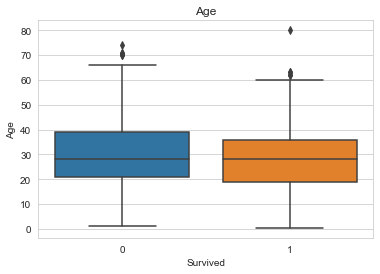

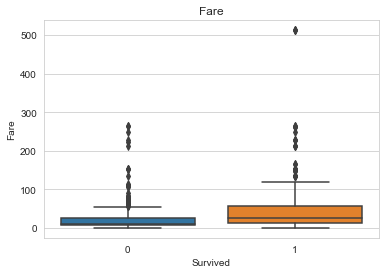

In [48]:
for feature in continuous_feature:
    data=df.copy()
    
    sns.boxplot(x='Survived', y=feature, data=data)
    #data.boxplot(column=feature, by='Survived')
    
    plt.xlabel('Survived')
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

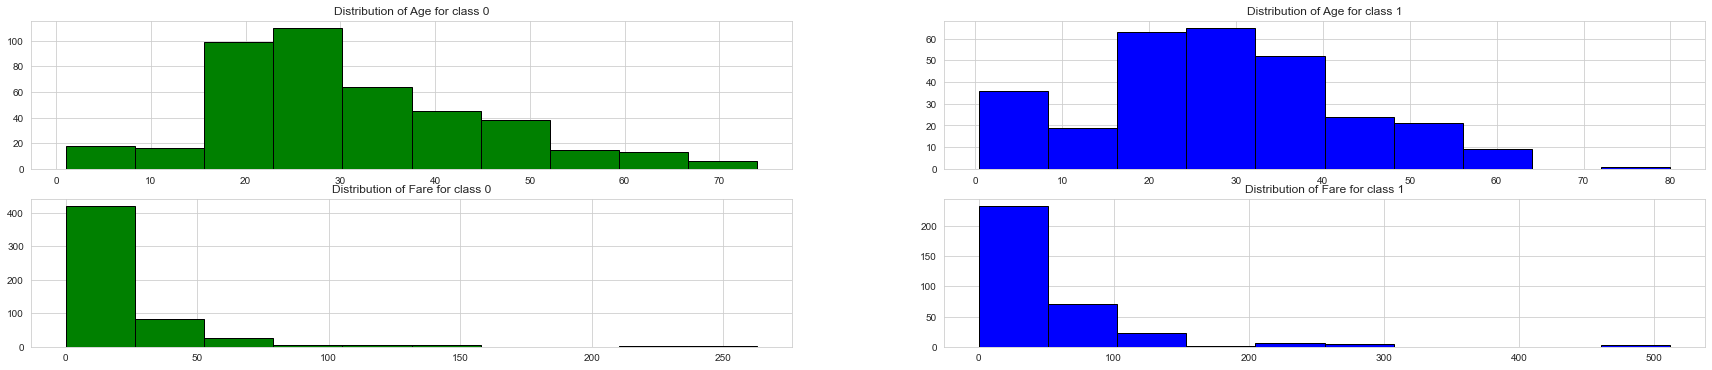

In [69]:
fig,ax = plt.subplots(len(continuous_feature), 2,figsize = (30,6))
colors = ['green', 'blue']

for i in range(len(continuous_feature)):
    ax[i, 0].hist([df[df['Survived']==0][continuous_feature[i]]], color = colors[0], edgecolor = 'black')
    ax[i, 0].set_title(f'Distribution of {continuous_feature[i]} for class 0')
    
    ax[i, 1].hist([df[df['Survived']==1][continuous_feature[i]]], color = colors[1], edgecolor = 'black')
    ax[i, 1].set_title(f'Distribution of {continuous_feature[i]} for class 1')
    
plt.show()


* There are many outliers so if we want to represent these boxplots (continuos feature) with one single value its better to use median than mean since median is not sensitive to outliers.

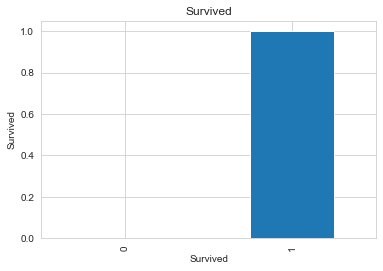

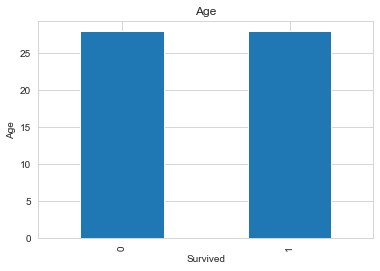

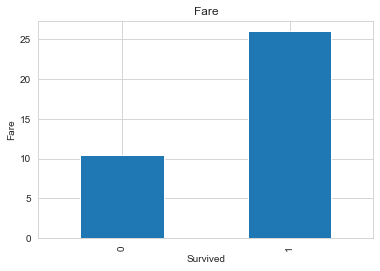

In [43]:
for feature in continuous_feature:
    data=df.copy()
    data.groupby('Survived')[feature].median().plot.bar()
    plt.xlabel('Survived')
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

### Step 7 : Categorical Features

In [44]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O' and feature not in ['Name']]
print(len(categorical_features))
print(categorical_features)

4
['Sex', 'Ticket', 'Cabin', 'Embarked']


In [45]:
for feature in categorical_features:
    print(f'Feature {feature} - Number of Categories {len(df[feature].unique())}')

Feature Sex - Number of Categories 2
Feature Ticket - Number of Categories 681
Feature Cabin - Number of Categories 148
Feature Embarked - Number of Categories 4


Show the distribution of categorical features using CountPlot. We can not plot all the categories of features with huge cardinality. So I will plot only the frequencies/counts of top k most frequent categories.

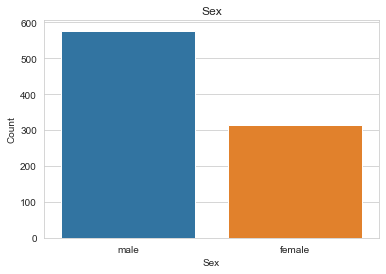

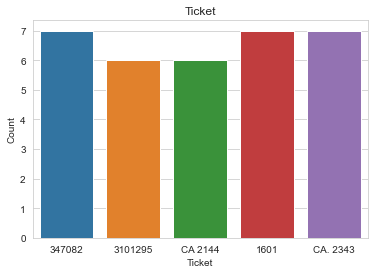

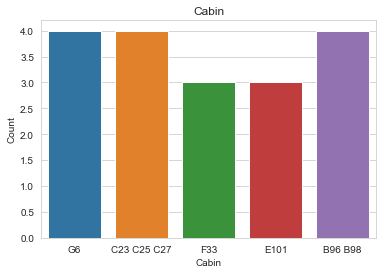

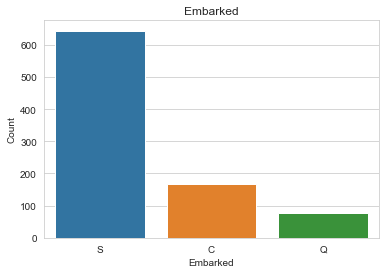

In [46]:
for feature in categorical_features:
    data=df.copy()  
    
    cardinality = len(df[feature].unique())
    if cardinality > 20:
        top_categories = df[feature].value_counts().sort_values(ascending=False).head(5).index
        top = df[feature][df[feature].isin(top_categories)]      
        sns.countplot(x=top, data=data)
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.title(feature)
        plt.show()
        
    else:    
        sns.countplot(x=feature, data=data)
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.title(feature)
        plt.show()

Find out the relationship between categorical variable and dependent feature Survived

In [ ]:
df.groupby('target')['feature'].describe()

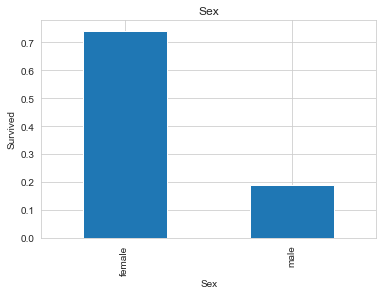

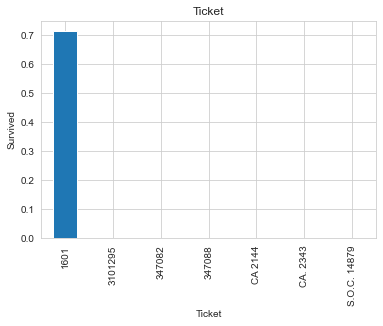

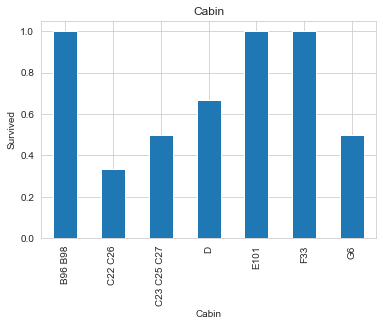

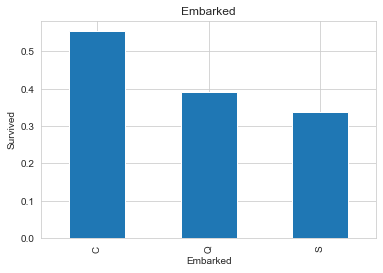

In [47]:
for feature in categorical_features:
    data=df.copy()
    
    cardinality = len(df[feature].unique())
    if cardinality < 20:
        data.groupby(feature)['Survived'].mean().plot.bar()
        plt.xlabel(feature)
        plt.ylabel('Survived')
        plt.title(feature)
        plt.show()
        
    else:
        top_categories = df[feature].value_counts().sort_values(ascending=False).head(7).index
        top = df[feature][df[feature].isin(top_categories)]
        data.groupby(top)['Survived'].mean().plot.bar()
        plt.xlabel(feature)
        plt.ylabel('Survived')
        plt.title(feature)
        plt.show()

### Step 8 : Outliers

* If feature is normally distributed we use every value that is higher than mean + 3std or lower than mean - 3std is an outlier. If feature does not follow Normal Distribution every value that is higher than 75% percentile + 1.5IQR or lower than 25% - 1.5IQR where IQR = 75% percentile - 25% percentile, is considered as an outlier (using boxplots).
* From the histograms of continuos features we saw that they dont follow the Normal Distribution so I am going to use Boxplot (quantiles) to detect outliers.

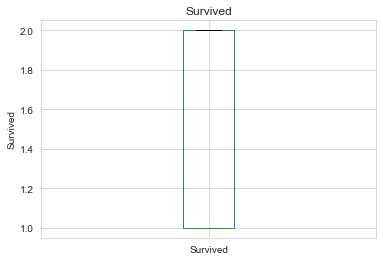

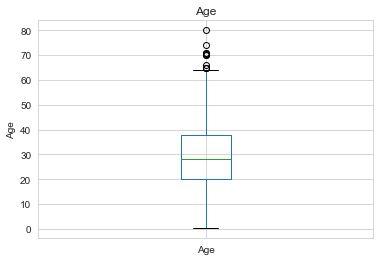

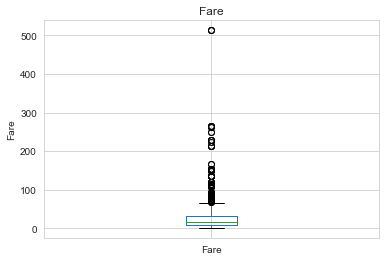

In [48]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        data[feature] = data[feature] + 1
    
    #data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

* We can see that there are many outliers in Age and Fare.

### Step 9 : Other Plots